In [4]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers as hf
import pandas as pd
import scikits.bootstrap as boot

import scipy.stats as sps

def folded_bias(prevcurr, error, window, step):
    xxx = np.arange(-np.pi, np.pi, step)
    t_err=[]; err = []
    for t in xxx:
        idx = (prevcurr>=t-window/2) & (prevcurr<t+window/2)
        if t-window/2 < -np.pi:
            idx = (prevcurr>=t-window/2) & (prevcurr<t+window/2) | (prevcurr>np.pi-(window/2-(np.pi-np.abs(t))))
        if t+window/2 > np.pi:
            idx = (prevcurr>=t-window/2) & (prevcurr<t+window/2) | (prevcurr<-np.pi+(window/2-(np.pi-np.abs(t))))
        t_err.append(list(error[idx]))
    for t in reversed(range(int(len(xxx)/2))):
        err.append([x*-1 for x in t_err[t]]+t_err[-t-1])
    m_err   = [sps.circmean(x, low=-np.pi, high=np.pi) for x in err]
    se_err  = [sps.circstd(x) for x in err]
    return np.array(se_err), np.array(se_err)


bias_ctrl = np.loadtxt('./data/Fig_3/FIGURE3_beh_Apre0.00022.txt', dtype='S')[:,1:].astype('float')  #1 #22
bias_enc  = np.loadtxt('./data/Fig_3/FIGURE3_beh_Apre0.00012.txt' ,dtype='S')[:,1:].astype('float')  #5 #12
bias_schz = np.loadtxt('./data/Fig_3/FIGURE3_beh_Apre0.00002.txt', dtype='S')[:,1:].astype('float')  #11 #02


np.set_printoptions(precision=4)
sns.set_context("talk", font_scale=1)
sns.set_style("ticks")

uglybrown   = sns.xkcd_rgb["ugly brown"]
darkmauve   = sns.xkcd_rgb["dark mauve"]
darkorange  = sns.xkcd_rgb["dark orange"]
window      = np.pi/3
step        = np.pi/30
xxx         = np.arange(0, np.pi, step)

sb_ctrl = np.zeros([3,len(xxx)]); se_ctrl = np.zeros([3,len(xxx)])
sb_enc  = np.zeros([3,len(xxx)]); se_enc  = np.zeros([3,len(xxx)])
sb_schz = np.zeros([3,len(xxx)]); se_schz = np.zeros([3,len(xxx)])

for bi, beh in enumerate([bias_ctrl,bias_enc,bias_schz]):
    for i in range(3):
        dists   = hf.circdist(beh[:,0], beh[:,1])
        err     = hf.circdist(beh[:,2+i], beh[:,1]) #resp, target
        out     = ((err>1) | (err<-1))
        if bi == 0: sb_ctrl[i,:], se_ctrl[i,:] = \
                    folded_bias(dists[~out], err[~out], window, step)
        if bi == 1: sb_enc[i,:], se_enc[i,:] = \
                    folded_bias(dists[~out], err[~out], window, step)
        if bi == 2: sb_schz[i,:], se_schz[i,:] = \
                    folded_bias(dists[~out], err[~out], window, step)


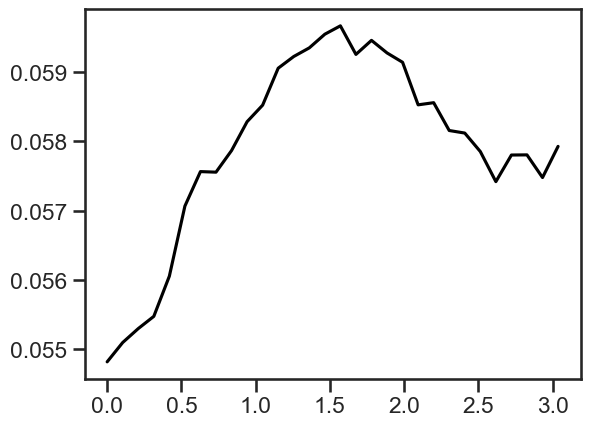

In [5]:
plt.plot(xxx,sb_ctrl[0], '-', color='k')
